### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Transformation

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%%time
new_df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 4.14 s


In [7]:
new_df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,level4_id_x2xocZ2ffvV9TBpbWEd0C99XcsMY/d7WuhqSocGXF/M=,level4_id_x6ydbyAZ5cg/SPyo/WvjhfZ4RkUk89e10PElUmNMwf0=,level4_id_xwq9S3SOMEYKW8W5OavIdIhjGY5PqtNwjGvAIOS1g+Y=,level4_id_y84LImFGtQZt7uAAN9ipC5M5THCImwCk8xEYF3/BzHA=,level4_id_yAzQR919g6E/LcFFdUOg/UDlVYQtRNHvS19zOJV2V/o=,level4_id_yFIhXSdRiIbnAJXjpjveYhhXopOOxVcUHbLdetuOIEc=,level4_id_ydx3O+QKc8BXLVlrYy2opLQARV0qYy6CUvHFZn2Eths=,level4_id_zI1qYT7KOxUn/HpISafbc4uU5cg4H+Vpd/DB9QzVOPg=,level4_id_zMYuCCkIy21KGCJ6fnAHFAXbm2tJyKjVNlL/3d9WiUI=,level4_id_zyVjBuMRkEs/hVTbayt34VrOAU1KNtk5Tt0EvU+/xhk=
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Train Set and Test Set

In [8]:
from sklearn.model_selection import train_test_split

X = new_df.drop('level', axis=1)
y = new_df['level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((386049, 190), (96513, 190), (386049,), (96513,))

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.7668873  -1.05297703  0.80925266 ... -0.05642051 -0.01055449
  -0.05475601]
 [-0.87581887 -0.88267614 -0.6250528  ... -0.05642051 -0.01055449
  -0.05475601]
 [ 0.64922312  0.30943008 -0.506747   ... -0.05642051 -0.01055449
  -0.05475601]
 ...
 [-0.33116102 -0.20147258  0.4250637  ... -0.05642051 -0.01055449
  -0.05475601]
 [-0.44009259 -0.20147258  0.30041572 ... -0.05642051 -0.01055449
  -0.05475601]
 [-0.0043663  -0.54207436 -0.3347767  ... -0.05642051 -0.01055449
  -0.05475601]]
[[-4.40092588e-01 -3.71773474e-01 -4.64547192e-01 ... -5.64205051e-02
  -1.05544887e-02 -5.47560069e-02]
 [ 3.22428410e-01 -3.71773474e-01  4.64905515e-01 ... -5.64205051e-02
  -1.05544887e-02 -5.47560069e-02]
 [-4.40092588e-01 -5.42074363e-01 -5.19187400e-01 ...  1.77240526e+01
  -1.05544887e-02 -5.47560069e-02]
 ...
 [-4.40092588e-01 -2.01472584e-01  9.90248349e-01 ... -5.64205051e-02
  -1.05544887e-02 -5.47560069e-02]
 [ 3.69930712e+00  3.20454521e+00 -4.23725874e-01 ... -5.64205051e-02
  -1.05544887

In [44]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38006    57     4     0     0]
 [   12 42424   129    24    17]
 [   34   877  4542   279   241]
 [   15   362   666  1538   851]
 [   10   221   381   491  5332]]


0.9516023748096112

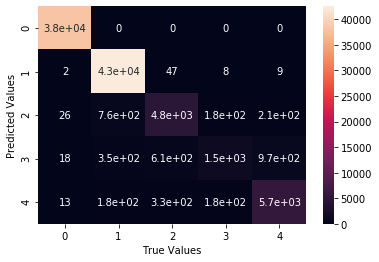

In [31]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

### Feature Selection

### Amount of Variation

In [33]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold=.5)

In [34]:
data_high_variance = thresholder.fit_transform(X_train)

In [35]:
data_high_variance

array([[-0.7668873 , -1.05297703,  0.80925266, ..., -0.05642051,
        -0.01055449, -0.05475601],
       [-0.87581887, -0.88267614, -0.6250528 , ..., -0.05642051,
        -0.01055449, -0.05475601],
       [ 0.64922312,  0.30943008, -0.506747  , ..., -0.05642051,
        -0.01055449, -0.05475601],
       ...,
       [-0.33116102, -0.20147258,  0.4250637 , ..., -0.05642051,
        -0.01055449, -0.05475601],
       [-0.44009259, -0.20147258,  0.30041572, ..., -0.05642051,
        -0.01055449, -0.05475601],
       [-0.0043663 , -0.54207436, -0.3347767 , ..., -0.05642051,
        -0.01055449, -0.05475601]])

In [51]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.5)

# Fit the selector to normalized head_df
sel.fit(new_df / new_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = new_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(new_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 191 to 188.


### Pairwise Correlations

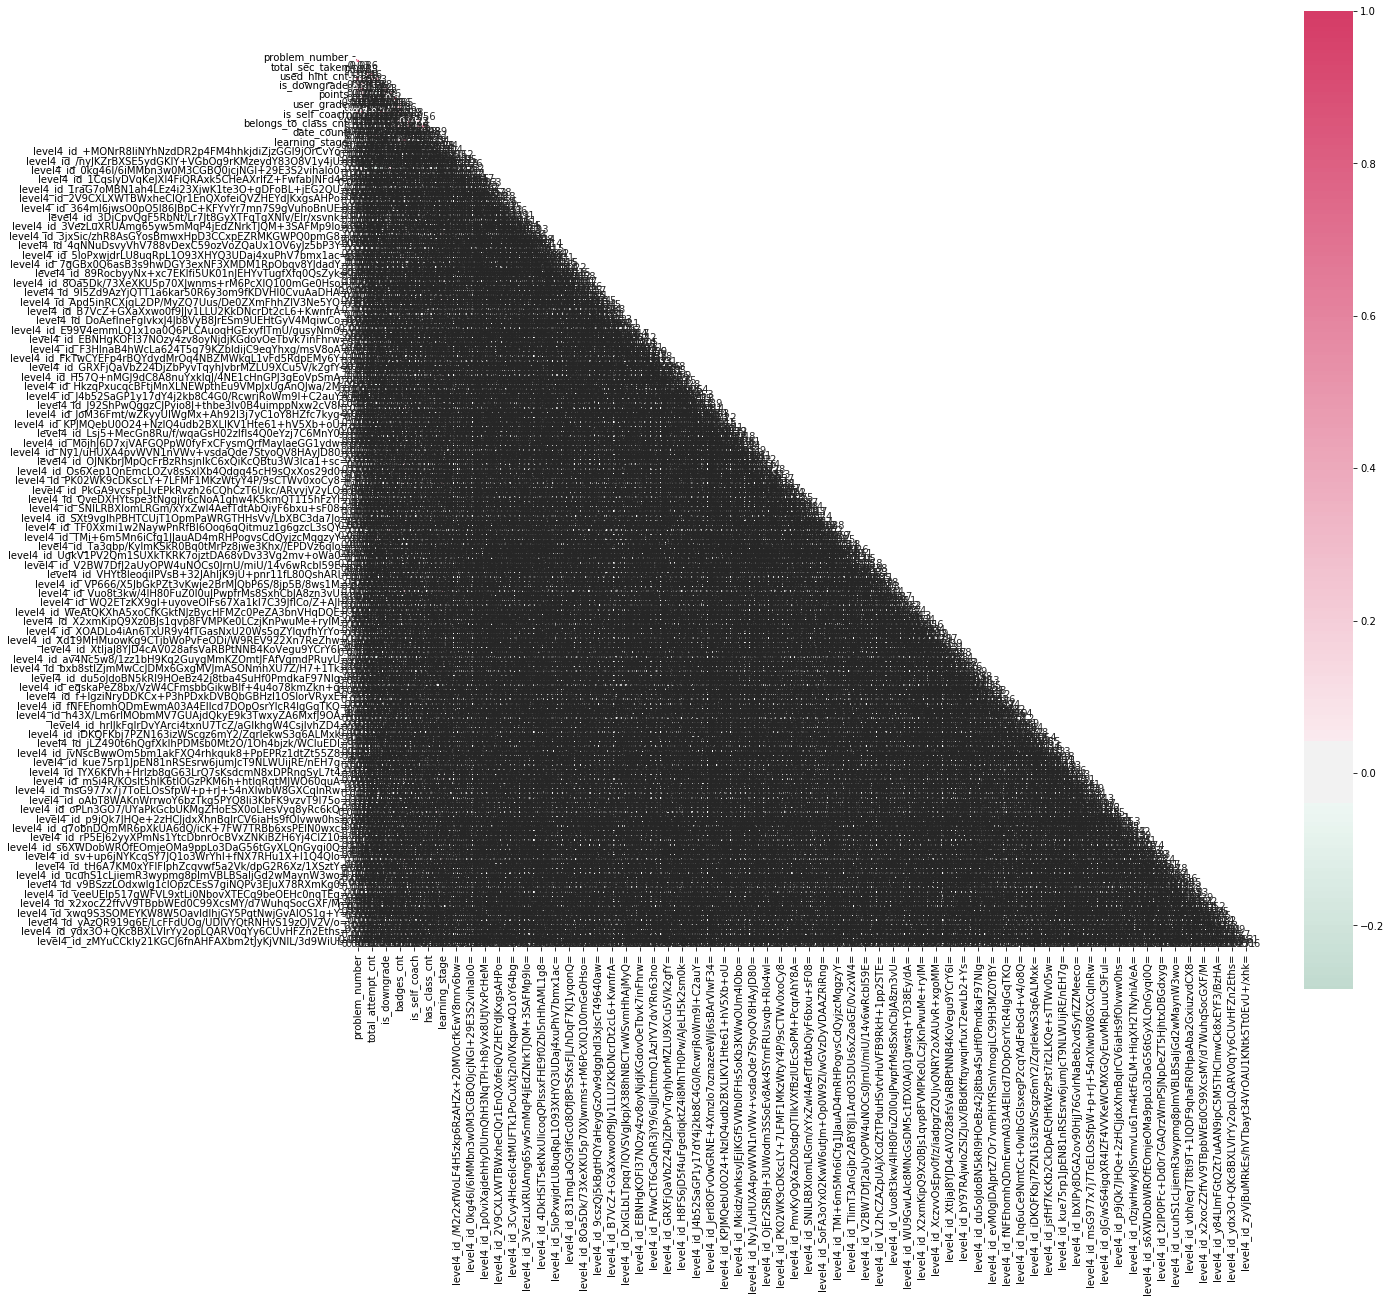

In [13]:
import seaborn as sns
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [62]:
from itertools import combinations
from scipy import stats

correlations = {}
columns = reduced_df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = stats.pearsonr(reduced_df.loc[:, col_a], reduced_df.loc[:, col_b])

result = reduced_df.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())

                                                         PCC        p-value
badges_cnt__belongs_to_class_cnt                    0.180019   0.000000e+00
badges_cnt__date_count                             -0.012402   6.959022e-18
badges_cnt__has_class_cnt                           0.087534   0.000000e+00
badges_cnt__has_student_cnt                         0.023513   5.478461e-60
badges_cnt__has_teacher_cnt                         0.176846   0.000000e+00
...                                                      ...            ...
used_hint_cnt__level4_id_ydx3O+QKc8BXLVlrYy2opL...  0.030952  1.362156e-102
used_hint_cnt__level4_id_zI1qYT7KOxUn/HpISafbc4... -0.010584   1.949090e-13
used_hint_cnt__level4_id_zMYuCCkIy21KGCJ6fnAHFA...  0.014299   2.972240e-23
used_hint_cnt__level4_id_zyVjBuMRkEs/hVTbayt34V... -0.024012   1.761143e-62
used_hint_cnt__points                              -0.045267  2.947658e-217

[17578 rows x 2 columns]


### Principal Component Analysis (PCA)

In [16]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Stepwise Selection

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'is_self_coach', 'belongs_to_class_cnt', 'date_count']
[1.15696891e-01 1.60129093e-01 2.10343437e-02 2.68239189e-02
 4.01715173e-02 2.25565400e-02 3.48639095e-03 3.83325729e-01
 2.60712963e-02 1.95566639e-02 9.33764039e-03 7.60974293e-03
 1.02501929e-01 1.46409062e-03 7.95094894e-03 2.31434450e-03
 8.43544783e-03 3.76113617e-03 1.93388335e-03 6.82503511e-05
 3.82805243e-04 5.99792995e-06 7.52065131e-06 1.97561614e-05
 2.47429870e-03 1.32996903e-04 4.01801988e-05 7.48933085e-06
 5.00381227e-04 2.42637686e-07 1.05772735e-04 3.75912565e-04
 4.69485234e-06 6.91821469e-05 3.45820250e-05 8.59464850e-05
 5.45431681e-05 3.17089492e-05 4.98955314e-04 6.59407125e-06
 7.42574925e-06 3.43822749e-04 3.24729271e-05 3.20655158e-04
 5.31754979e-06 1.00929516e-05 2.68146078e-06 9.95755688e-05
 6.08175531e-05 4.75448955e-04 1.461

### Feature Importance

In [15]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

C:\Users\likwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\likwe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


KeyboardInterrupt: 